<h3> Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
#storintg the path of dataset in path var
path = '/content/product_reviews_final_data.csv'

In [4]:
df=pd.read_csv(path,  encoding='cp1252')
#encoding to prevent errors as the csv file may contain special characters

In [5]:
df.head()

,review,sentiment
0,Worth the price.,positive
1,Five stars! Very useful and easy to use.,positive
2,Very useful and easy to use. Very useful and e...,positive
3,Loved it. Very useful and easy to use. Excelle...,positive
4,Worst product ever! Very disappointed.,negative


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2564 entries, 0 to 2563
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     2564 non-null   object
 1   sentiment  2564 non-null   object
dtypes: object(2)
memory usage: 40.2+ KB


In [7]:
df.duplicated().sum()

np.int64(289)

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(2275, 2)

<h3> Importing the libraries specific to language processing

In [10]:
#import libraries for cleaning text
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

<h3> Removing stopwords

In [11]:
#stopwords : contains no significant meaning to contribute overall understanding of text
#Examples include articles (like "the," "a"), prepositions (like "in," "on"), conjunctions (like "and," "but"), and pronouns (like "he," "she").
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [75]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [12]:
#punkt : a module providing unsupervised ml approach for sentence tokenization
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

<h3> Stemming

- Stemming the words to their base or root form using porter stemmer i.e. an algorithm of stemming effiective for English words

In [102]:
stemmer=PorterStemmer()
#from nltk.stem import WordNetLemmatizer
#lemmatizer = WordNetLemmatizer()

In [103]:
stop_words = set(stopwords.words('english'))

In [104]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

<h3> Creating a function that does everything needed to clean the text

In [105]:
def clean_text(text):
  text1 = text

  #convert into lower case
  text = text.lower()

  #remove punctuation
  text = text.translate(str.maketrans('','',string.punctuation))

  #tokenization
  text = text.split()

  #removing stop words
  text=[stemmer.stem(word) for word in text if word not in stop_words]
  return" ".join(text)

  print("transformed text: ", text)

In [106]:
#check working of the function
clean_text("Let us hope, it'll work out!")

'let us hope itll work'

In [107]:
x = df['review']

Storing cleaned 'review' feature in x

In [108]:
#apply it on the text we have in review column:
x = df['review'].apply(clean_text)

In [109]:
y = df['sentiment']

<h3> Spliting into train and test data

In [110]:
!pip install -U scikit-learn==1.7.0


In [111]:
import sklearn
print(sklearn.__version__)


1.7.0


In [112]:
from sklearn.model_selection import train_test_split

In [113]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=42)

<h3> Vectorization: Count Vectorizer

In [114]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
x_train_vectorizer = vectorizer.fit_transform(x_train)
x_test_vectorizer = vectorizer.transform(x_test) #only transform on test data

<h3> Importing Naive Bayes

In [115]:
from sklearn.naive_bayes import MultinomialNB
MNB=MultinomialNB()

In [116]:
MNB.fit(x_train_vectorizer, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


- Test the model

In [117]:
y_pred = MNB.predict(x_test_vectorizer)

<h3> Checking the Accuracy score

In [118]:
from sklearn.metrics import accuracy_score, classification_report

In [119]:
print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.9736263736263736


In [120]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.96      0.99      0.97       226
    positive       0.99      0.96      0.97       229

    accuracy                           0.97       455
   macro avg       0.97      0.97      0.97       455
weighted avg       0.97      0.97      0.97       455



<h2>
- Check the working
</h2>

In [121]:
sample = ["product working so well"]
sample_vec = vectorizer.transform(sample)
print(MNB.predict(sample_vec))

['positive']


In [123]:
sample = ["Worth every single penny"]
sample_vec = vectorizer.transform(sample)
print(MNB.predict(sample_vec))

['negative']


In [124]:
print(vectorizer.get_feature_names_out())

['1010' 'absolut' 'actual' 'advertis' 'afford' 'amaz' 'among' 'anyth'
 'attent' 'averag' 'awesom' 'bad' 'batteri' 'best' 'better' 'bit' 'bought'
 'box' 'brilliant' 'broke' 'build' 'built' 'butter' 'buy' 'cant' 'chang'
 'changer' 'charm' 'cheap' 'check' 'choic' 'comfort' 'competitor'
 'complaint' 'complet' 'condit' 'confus' 'cool' 'could' 'couldnt' 'custom'
 'daili' 'damag' 'day' 'decis' 'definit' 'degrad' 'delight' 'deliv'
 'deliveri' 'depend' 'describ' 'descript' 'design' 'detail' 'disappoint'
 'doesnt' 'durabl' 'easi' 'easier' 'easili' 'effici' 'engin' 'ever'
 'everi' 'everyon' 'everyth' 'exactli' 'exceed' 'excel' 'except' 'expect'
 'expens' 'experi' 'extrem' 'face' 'fantast' 'far' 'fast' 'featur' 'feel'
 'find' 'first' 'five' 'flaw' 'flawlessli' 'forward' 'fragil' 'function'
 'game' 'genuin' 'gift' 'give' 'glad' 'good' 'got' 'great' 'guarante'
 'hand' 'handi' 'happi' 'happier' 'help' 'henc' 'high' 'highli' 'honest'
 'honestli' 'hope' 'hous' 'imagin' 'impecc' 'impress' 'incred' 'inte

<h2> Checking correct and incorrect predictions made per class using Confusion matrix

In [125]:
from sklearn.metrics import confusion_matrix


In [126]:
C_matrix = confusion_matrix(y_test, y_pred, labels=['positive','negative'])

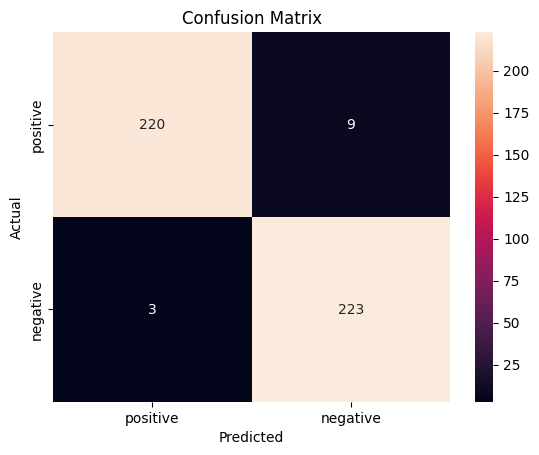

In [127]:
sns.heatmap(C_matrix, annot=True, fmt = 'd', xticklabels=['positive','negative'],yticklabels=['positive','negative'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [128]:
import joblib

joblib.dump(MNB, "sentiment_model.pkl")
joblib.dump(vectorizer, "TFIDF_vectorizer.pkl")

['TFIDF_vectorizer.pkl']

In [129]:
from google.colab import files

files.download("sentiment_model.pkl")

files.download("TFIDF_vectorizer.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import site
site.USER_BASE


'/root/.local'